In [55]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from scipy.linalg import svd

import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
try:
    from ucimlrepo import fetch_ucirepo
except ImportError:
    print("Please install the ucimlrepo with pip :)")

In [57]:
# fetch dataset 
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878) 
  
# data (as pandas dataframes) 
X = cirrhosis_patient_survival_prediction.data.features 
  
# metadata 
print(cirrhosis_patient_survival_prediction.metadata) 
  
# variable information 
print(cirrhosis_patient_survival_prediction.variables)

data = pd.DataFrame(X)

{'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'ID': 296, 'type'

In [58]:
print(data.head())

              Drug    Age Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  \
0  D-penicillamine  21464   F       Y            Y       Y     Y       14.5   
1  D-penicillamine  20617   F       N            Y       Y     N        1.1   
2  D-penicillamine  25594   M       N            N       N     S        1.4   
3  D-penicillamine  19994   F       N            Y       Y     S        1.8   
4          Placebo  13918   F       N            Y       Y     N        3.4   

  Cholesterol  Albumin Copper  Alk_Phos    SGOT Tryglicerides Platelets  \
0         261     2.60    156    1718.0  137.95           172       190   
1         302     4.14     54    7394.8  113.52            88       221   
2         176     3.48    210     516.0   96.10            55       151   
3         244     2.54     64    6121.8   60.63            92       183   
4         279     3.53    143     671.0  113.15            72       136   

   Prothrombin  Stage  
0         12.2    4.0  
1         10.6    3.0  
2 

In [59]:
#data preparation and cleaning

data = data.replace('NaNN', np.nan)

cols = data.columns

na_per_col = {}

for col in cols:
    na_per_col[col] = data[col].isna().sum()


for key, value in na_per_col.items():
    print(key, value)

Drug 106
Age 0
Sex 0
Ascites 106
Hepatomegaly 106
Spiders 106
Edema 0
Bilirubin 0
Cholesterol 134
Albumin 0
Copper 108
Alk_Phos 106
SGOT 106
Tryglicerides 136
Platelets 11
Prothrombin 2
Stage 6


Scaling the data

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop(columns=['Stage'])  # All features except the target
y = data['Stage']                 # Target column

# Check for any remaining non-numeric columns and handle them if necessary
X = X.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns for scaling

# Split the data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fill NaN values if there are any in the numeric columns (e.g., with the mean of the column)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())  # Use training mean to avoid data leakage

# Apply scaling only on the training data, and then transform the test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)        # Only transform on test data

# Now X_train_scaled and X_test_scaled contain scaled features,
# while y_train and y_test remain unchanged as the target variable


Splitting into train and test

In [63]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = data.drop(columns=['Stage'])
y = data['Stage']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
print("y_train min:", y_train.min(), "y_train max:", y_train.max())
print("y_test min:", y_test.min(), "y_test max:", y_test.max())


y_train min: 1.0 y_train max: 4.0
y_test min: 1.0 y_test max: 4.0


In [72]:
import pandas as pd
import numpy as np


# Defining bins
bins = [0.5, 1.5, 2.5, 3.5, 4.5]
labels = [0, 1, 2, 3]  # Map 1.0 to 4.0 to classes 0 to 3

# Apply pd.cut to discretize y_train and y_test
y_train_discrete = pd.cut(y_train, bins=bins, labels=labels).cat.codes
y_test_discrete = pd.cut(y_test, bins=bins, labels=labels).cat.codes

# Verify transformation
print("y_train_discrete unique values:", y_train_discrete.unique())
print("y_test_discrete unique values:", y_test_discrete.unique())

# Convert y_train and y_test to discrete classes using pd.cut, then use .cat.codes to get integer values
y_train_discrete = pd.cut(y_train, bins=bins, labels=labels).cat.codes
y_test_discrete = pd.cut(y_test, bins=bins, labels=labels).cat.codes


# Verify the transformation
print("y_train_discrete:", y_train_discrete.unique())
print("y_test_discrete:", y_test_discrete.unique())


y_train_discrete unique values: [-1  3  1  2  0]
y_test_discrete unique values: [-1  1  3  2  0]
y_train_discrete: [-1  3  1  2  0]
y_test_discrete: [-1  1  3  2  0]


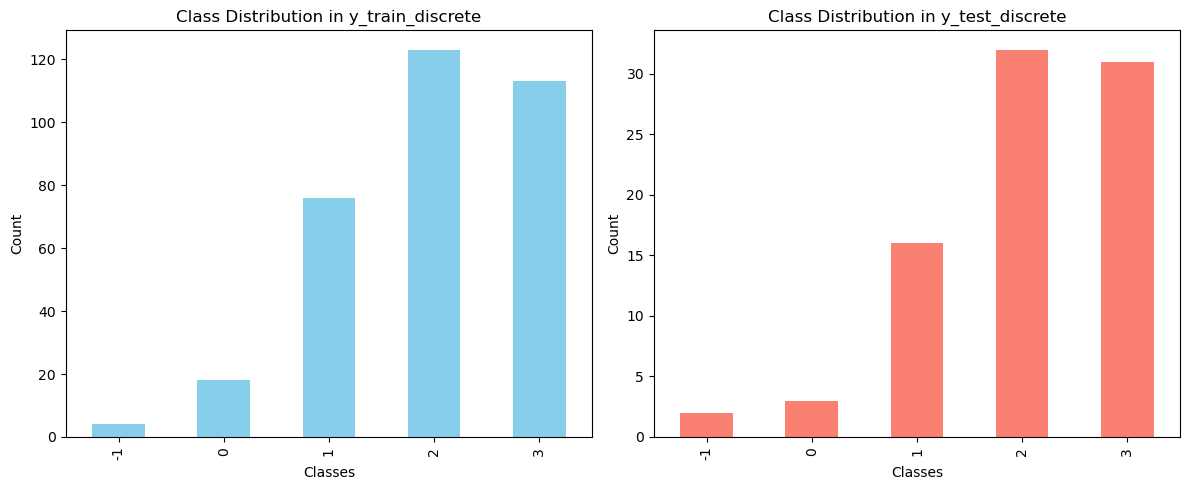

In [77]:
import matplotlib.pyplot as plt

# Plot class distribution for train and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
y_train_discrete.value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title("Class Distribution in y_train_discrete")
axes[0].set_xlabel("Classes")
axes[0].set_ylabel("Count")

y_test_discrete.value_counts().sort_index().plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title("Class Distribution in y_test_discrete")
axes[1].set_xlabel("Classes")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


Baseline model

In [73]:
print(y_train_discrete.value_counts())
print(y_test_discrete.value_counts())


 2    123
 3    113
 1     76
 0     18
-1      4
Name: count, dtype: int64
 2    32
 3    31
 1    16
 0     3
-1     2
Name: count, dtype: int64


In [74]:

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Train the baseline model using the discrete target labels
baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train_scaled, y_train_discrete)

# Make predictions on the test set
y_pred_baseline = baseline_model.predict(X_test_scaled)

# Calculate and print the accuracy
baseline_accuracy = accuracy_score(y_test_discrete, y_pred_baseline)
print("Baseline Model Accuracy:", baseline_accuracy)


Baseline Model Accuracy: 0.38095238095238093


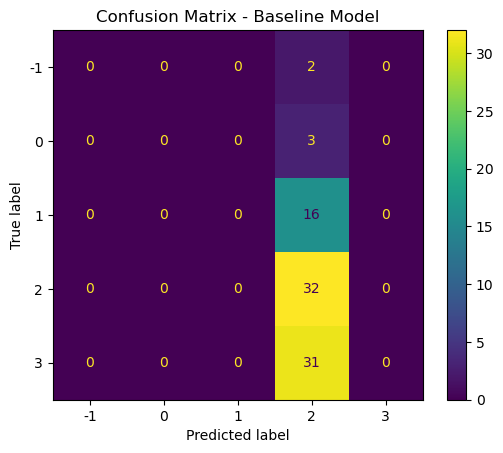

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay

# Generate and display confusion matrix for baseline model
ConfusionMatrixDisplay.from_predictions(y_test_discrete, y_pred_baseline)
plt.title("Confusion Matrix - Baseline Model")
plt.show()
